<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/py20_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movielens 데이터셋

* GitHub : https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens

* movies.dat
  * movieID::Title::Genres
* ratings.dat
  * UserID::MovieID::Rating::TimeStamp
* Users.dat
  * UserID::Gender::Age::Occupation::Zip-code
* 모든 데이터 파일을 첫번째 줄부터 데이터가 작성되어져 있음.
* 컬럼 이름이 파일에 포함되어 있지 않음.

In [7]:
movies_cols = ['movie_id','title','genres']
raings_cols = ['user_id','movie_id','ratings','timestamp']
users_cols = ['user_id','gender','age','occupation','zip-code']

## Movies

In [5]:
movies_file='https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'

In [8]:
# movies.dat 파일 읽어서 데이터프레임 생성 :

movies = pd.read_csv(movies_file, sep='::', names=movies_cols, engine='python')

In [10]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


### 장르 분석

* 특정 장르에 해당하는 영화 개수 (예)
* 어떤 장르에 해당하는 영화가 가장 많은지

In [13]:
# 애니메이션 장르의 영화 찾기

animations = movies[movies.genres.str.contains('Animation')]

In [14]:
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [15]:
# 로맨틱 코미디 장르

roco = movies[(movies.genres.str.contains('Romance')) & (movies.genres.str.contains('Comedy'))]

In [16]:
roco

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


* 가장 빈도수가 많은 장르?

* 장르 빈도수 순서



In [32]:
genrelist = movies.genres.str.split('|')
genres = []
for x in genrelist:

  for y in x:

    genres.append(y)

# genres = []
# for s in movies.genres:
#   genres.extend(s.split('|'))

In [33]:
genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [57]:
tgc = pd.value_counts(genres)

In [58]:
tgc

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

<class 'pandas.core.series.Series'>
Index: 18 entries, Drama to Film-Noir
Series name: None
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 844.0+ bytes


<Axes: >

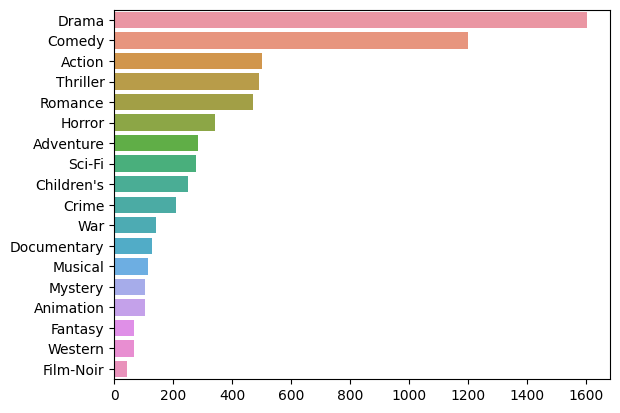

In [65]:
tgc.info()

sns.barplot(y=tgc.index, x=tgc.values)

In [134]:
# 연도별 개봉영화 수

years = movies.title.str[-5:-1].astype('int')

In [90]:
years_vi = years.value_counts()

<Axes: >

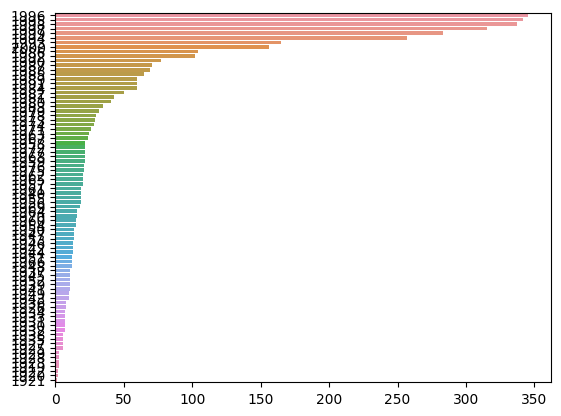

In [93]:
barp = sns.barplot(y=years_vi.index, x=years_vi.values)



<Axes: >

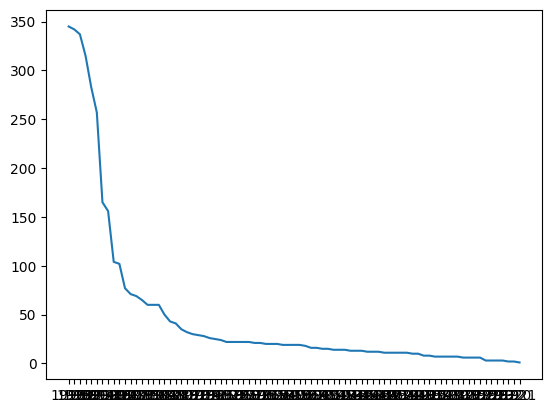

In [94]:
sns.lineplot(x=years_vi.index, y=years_vi.values)

### Users 데이터셋

In [95]:
file_path='https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/users.dat'

users = pd.read_csv(file_path, sep='::', names=users_cols, engine='python')

In [96]:
users

,user_id,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [97]:
users.head()

,user_id,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [98]:
users.tail()

,user_id,gender,age,occupation,zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


<Axes: xlabel='gender'>

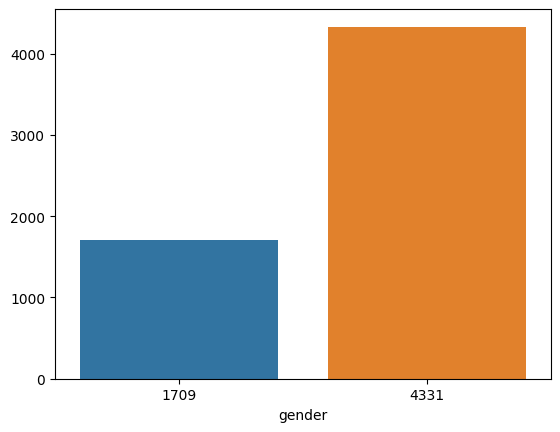

In [133]:
### 성별 빈도수
xx= users.groupby('gender')['gender'].count()

sns.barplot(data = xx, x=xx.index, y=xx.values)


<Axes: xlabel='ages'>

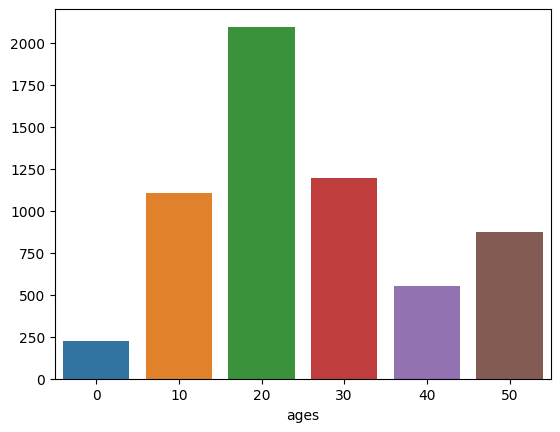

In [122]:
### 연령대 빈도수
ages = []
for x in users.age:

  ages.append((int(x)//10)*10)

users['ages']=ages

xxx = users.groupby('ages')['ages'].count()

sns.barplot(x=xxx.index, y=xxx.values)

In [117]:
### 직업군 빈도수

users.occupation

0       10
1       16
2       15
3        7
4       20
        ..
6035    15
6036     1
6037     1
6038     0
6039     6
Name: occupation, Length: 6040, dtype: int64

In [124]:
xxx2 = users.groupby('occupation')['occupation'].count()

<Axes: xlabel='occupation'>

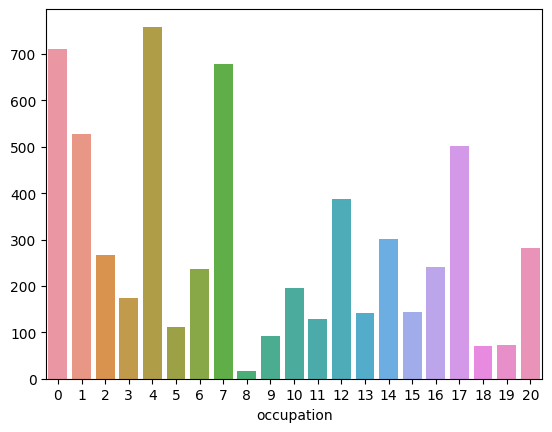

In [125]:
sns.barplot(x=xxx2.index, y=xxx2.values)

In [135]:
file_path = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/ratings.dat'

In [136]:
ratings = pd.read_csv(file_path, names=raings_cols, sep='::', engine='python')

In [137]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   ratings    1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [138]:
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [139]:
ratings.tail()

,user_id,movie_id,ratings,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


### rating 기술 통계량

In [140]:
ratings.ratings.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

<Axes: ylabel='ratings'>

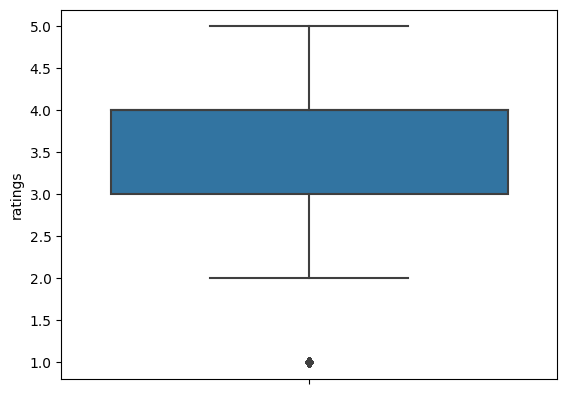

In [141]:
sns.boxplot(data=ratings, y=ratings.ratings)

In [142]:
ratings.ratings.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: ratings, dtype: int64

<Axes: xlabel='ratings', ylabel='count'>

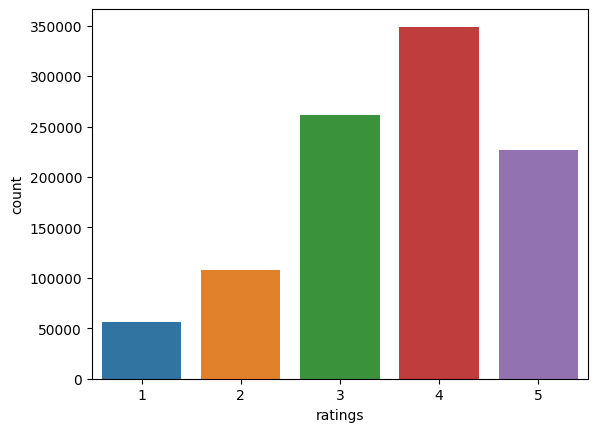

In [143]:
sns.countplot(data=ratings, x='ratings')

# 데이터 프레임 합치기( Merge, join )



In [144]:
# ratings, movies 데이터 프레임을 합침.
df = pd.merge(ratings, movies, how = 'inner')

In [147]:
dfs = pd.merge(df, users)

In [148]:
dfs

,user_id,movie_id,ratings,timestamp,title,genres,gender,age,occupation,zip-code,ages
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,0
...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662,40
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662,40
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662,40
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662,40


`pd.merge()` 함수 파라미터

* SQL의 join 기능
* left, right : 합칠(Merge 할) 데이터 프레임 또는 시리즈
* how : join 방식. 기본값 'inner'. [inner,left,right, full]
* on : join을 할 때 사용할 변수(컬럼) 이름. 두 데이터프레임의 컬럼 이름이 같은 경우 생략 가능.

<Axes: xlabel='gender', ylabel='count'>

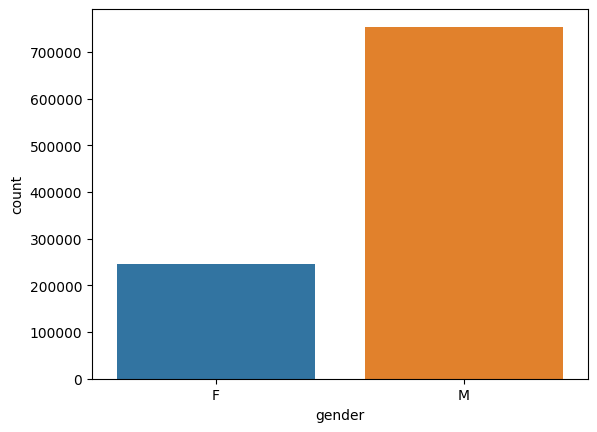

In [149]:
sns.countplot(data=dfs, x='gender')

<Axes: xlabel='ages', ylabel='count'>

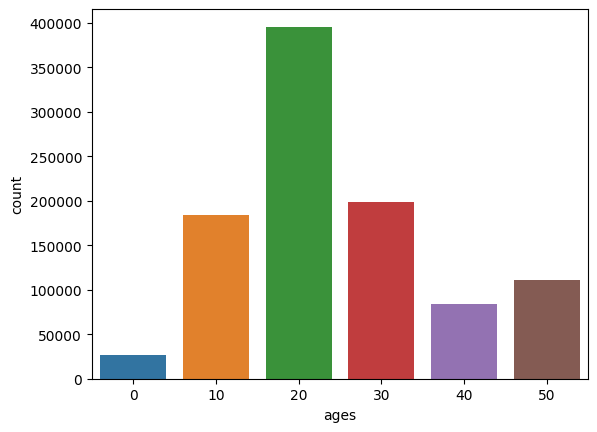

In [150]:
sns.countplot(data=dfs, x='ages')

<Axes: xlabel='occupation', ylabel='count'>

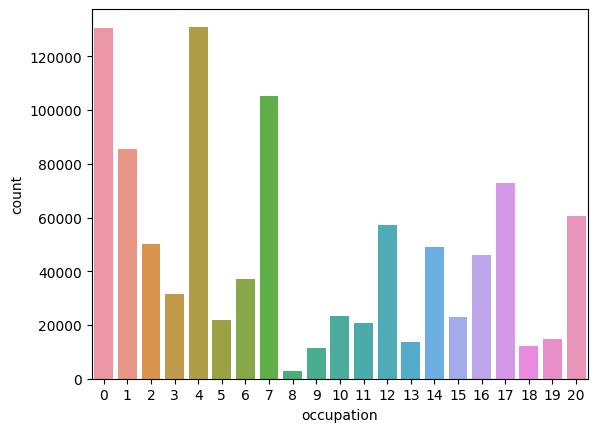

In [151]:
sns.countplot(data=dfs, x='occupation')

<Axes: xlabel='ratings', ylabel='count'>

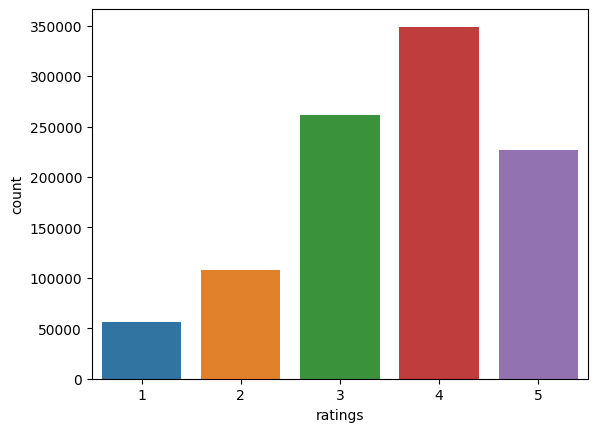

In [152]:
sns.countplot(data=dfs, x='ratings')

## 영화 별점 평균

### 영화 별점 상위/하위 10개 영화 제목

In [171]:
graphs = dfs.groupby('title')['ratings'].mean()

graphsort = graphs.sort_values(ascending=False)

print(graphsort[0:10])

print(graphsort[-1:-11:-1])

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: ratings, dtype: float64
title
Windows (1980)                                                1.0
Mutters Courage (1995)                                        1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Cheetah (1989)                                                1.0
Fantastic Night, The (La Nuit Fantastique) (1949)             1.0
Santa with Muscles (1996)                                     1.0
Low Life, The (1994)                                          1.0
Underw

In [175]:
dfs[dfs.title == 'Santa with Muscles (1996)']

,user_id,movie_id,ratings,timestamp,title,genres,gender,age,occupation,zip-code,ages
4185,58,1311,1,977936528,Santa with Muscles (1996),Comedy,M,25,2,30303,20
43552,601,1311,1,975882621,Santa with Muscles (1996),Comedy,F,18,20,06320,10
151219,1943,1311,1,993575910,Santa with Muscles (1996),Comedy,M,18,4,91501,10
157240,2015,1311,1,1017608306,Santa with Muscles (1996),Comedy,M,18,4,01003,10
381400,5070,1311,1,962507271,Santa with Muscles (1996),Comedy,M,25,2,55344,20
791972,193,1311,1,977018841,Santa with Muscles (1996),Comedy,F,45,15,44106,40
913715,1478,1311,1,974752662,Santa with Muscles (1996),Comedy,M,1,10,92620,0


별점 개수가 1-2개 밖에 없는 영화들의 별점 평균은 큰 의미가 없다. 일정 개수 ( ex. 10개, 50개, 100개 ) 이상의 별점 건수가 있는 영화들 중 평균을 계산하는 것이 더 의미 있다.

In [176]:
# 영화 제목 빈도수

title_counts = dfs.title.value_counts()

In [177]:
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

In [178]:
# 영화 제목 빈도수 상위 10개

title_counts.head(10)

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

In [179]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

150건 이상의 별점을 받은 영화들에 대해 별점 평균 분석

In [211]:
indexer = title_counts[title_counts >= 150].index

indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Alligator (1980)', 'Cowboy Way, The (1994)', 'Twelfth Night (1996)',
       'Program, The (1993)', 'Love and Death on Long Island (1997)',
       'Asphalt Jungle, The (1950)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Golden Voyage of Sinbad, The (1974)', 'In the Army Now (1994)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [186]:
# 150건 이상의 별점 리뷰가 있는 영화들의 별점 평균 계산
by_title_150 = graphs.loc[indexer]

In [187]:
by_title_150.sort_values(ascending=True).head(n=10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: ratings, dtype: float64

In [188]:
by_title_150.sort_values(ascending=True).tail(n=10)

Rear Window (1954)                                                     4.476190
Raiders of the Lost Ark (1981)                                         4.477725
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Wrong Trousers, The (1993)                                             4.507937
Schindler's List (1993)                                                4.510417
Usual Suspects, The (1995)                                             4.517106
Close Shave, A (1995)                                                  4.520548
Godfather, The (1972)                                                  4.524966
Shawshank Redemption, The (1994)                                       4.554558
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Name: ratings, dtype: float64

In [189]:
# 제목별 성별 별점 평균

dfs.head()

,user_id,movie_id,ratings,timestamp,title,genres,gender,age,occupation,zip-code,ages
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,0


In [195]:
dfs_by_gender= dfs.groupby(['title','gender'])['ratings'].mean()

In [232]:
dfs_by_gender

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: ratings, Length: 7152, dtype: float64

In [235]:
df2 = dfs.pivot_table(values='ratings', index='title', columns='gender', aggfunc='mean')

In [236]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 여성 별점 상위 평균 10개 영화

df2.loc[indexer].F.sort_values(ascending=False).head(10)




Close Shave, A (1995)                                     4.644444
Wrong Trousers, The (1993)                                4.588235
General, The (1927)                                       4.575758
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)             4.572650
Wallace & Gromit: The Best of Aardman Animation (1996)    4.563107
Schindler's List (1993)                                   4.562602
Grand Illusion (Grande illusion, La) (1937)               4.560976
Shawshank Redemption, The (1994)                          4.539075
Grand Day Out, A (1992)                                   4.537879
To Kill a Mockingbird (1962)                              4.536667
Name: F, dtype: float64

In [237]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 남성 별점 상위 평균 10개 영화

df2.loc[indexer].M.sort_values(ascending=False).head(10)

Godfather, The (1972)                                                  4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.576628
Shawshank Redemption, The (1994)                                       4.560625
Raiders of the Lost Ark (1981)                                         4.520597
Usual Suspects, The (1995)                                             4.518248
Star Wars: Episode IV - A New Hope (1977)                              4.495307
Schindler's List (1993)                                                4.491415
Paths of Glory (1957)                                                  4.485149
Wrong Trousers, The (1993)                                             4.478261
Close Shave, A (1995)                                                  4.473795
Name: M, dtype: float64

In [265]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서

# 여성들의 별점 평균 상위 100위 영화들의 장르, 장르별 빈도수

find = df2.loc[indexer].F.sort_values(ascending=False).index


# 남성들의 별점 평균 상위 100위 영화들의 장르, 장르별 빈도수

mind = df2.loc[indexer].M.sort_values(ascending=False).index

by_gender_genre = dfs.groupby(['title','genres'])['ratings'].mean()
by_gender_genre.loc[find].sort_values(ascending=False).head(100)

title                                                                genres                   
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)  Action|Drama                 4.560510
Shawshank Redemption, The (1994)                                     Drama                        4.554558
Godfather, The (1972)                                                Action|Crime|Drama           4.524966
Close Shave, A (1995)                                                Animation|Comedy|Thriller    4.520548
Usual Suspects, The (1995)                                           Crime|Thriller               4.517106
                                                                                                    ...   
Man for All Seasons, A (1966)                                        Drama                        4.232877
Anatomy of a Murder (1959)                                           Drama|Mystery                4.231156
Seventh Seal, The (Sjunde inseglet, Det) (1957)  

In [266]:
by_gender_genre.loc[mind].sort_values(ascending=False).head(100)

title                                                                genres                   
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)  Action|Drama                 4.560510
Shawshank Redemption, The (1994)                                     Drama                        4.554558
Godfather, The (1972)                                                Action|Crime|Drama           4.524966
Close Shave, A (1995)                                                Animation|Comedy|Thriller    4.520548
Usual Suspects, The (1995)                                           Crime|Thriller               4.517106
                                                                                                    ...   
Man for All Seasons, A (1966)                                        Drama                        4.232877
Anatomy of a Murder (1959)                                           Drama|Mystery                4.231156
Seventh Seal, The (Sjunde inseglet, Det) (1957)  

In [268]:
female_top_100 = df2.loc[indexer].sort_values(by='F',ascending=False).head(100)

female_top_100_titles = female_top_100.index

In [269]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [270]:
movies_with_index = movies.set_index('title')

In [276]:
def1 = movies_with_index.loc[female_top_100_titles]

In [277]:
genres = []

for x in def1.genres:

  genres.extend(x.split('|'))

print(genres)


['Animation', 'Comedy', 'Thriller', 'Animation', 'Comedy', 'Comedy', 'Film-Noir', 'Animation', 'Drama', 'War', 'Drama', 'War', 'Drama', 'Animation', 'Comedy', 'Drama', 'Animation', 'Comedy', 'Crime', 'Thriller', 'Comedy', 'Drama', 'Mystery', 'Thriller', 'Action', 'Drama', 'Thriller', 'Mystery', 'Thriller', 'Comedy', 'Crime', 'Comedy', 'Drama', 'Romance', 'Film-Noir', 'Romance', 'Thriller', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Western', 'Comedy', 'Drama', 'Film-Noir', 'Thriller', 'Drama', 'Drama', 'Documentary', 'Drama', 'War', 'Drama', 'War', 'Sci-Fi', 'War', 'Drama', 'War', 'Drama', 'Thriller', 'Drama', 'Drama', 'Film-Noir', 'Thriller', 'Adventure', "Children's", 'Drama', 'Musical', 'Comedy', 'Romance', 'Film-Noir', 'Thriller', 'Drama', 'Drama', 'Mystery', 'Thriller', 'Film-Noir', 'Mystery', 'Action', 'Adventure', 'Comedy', 'Romance', 'Musical', 'Romance', 'Documentary', 'Comedy', 'Drama', 'Musical', 'Romance', 'Action', 'Adventure', 'Drama', 'Drama', 'Thriller', 'Comedy', 'Action

In [278]:
genre_count = pd.value_counts(genres)

In [279]:
genre_count

Drama          45
Comedy         28
Thriller       23
Romance        20
Mystery        13
War            12
Film-Noir      11
Action          9
Crime           8
Adventure       6
Musical         6
Animation       5
Documentary     3
Sci-Fi          2
Children's      1
Western         1
Fantasy         1
Horror          1
dtype: int64